
Problem statement:-
The aim of the project is to predict fraudulent credit card transactions using machine learning models. This is crucial from the bank’s as well as customer’s perspective. The banks cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions.

The dataset contains transactions made over a period of two days in September 2013 by European credit cardholders. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. We need to take care of the data imbalance while building the model and come up with the best model by trying various algorithms.

Steps:-
The steps are broadly divided into below steps. The sub steps are also listed while we approach each of the steps.

1. Reading, understanding and visualising the data
2. Preparing the data for modelling
3. Building the model
4. Evaluate the model

In [ ]:
# this was used to import the dataset from the google drive
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the Libraries


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



#loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
# first 5 rows
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# checking the number of missing values in each coloumn
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
# Distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


Highly Imbalanced Dataset

0--> Normal Transaction

1--> Fraudulent Transaction


In [ ]:
#separating the data for analysis
legit = credit_card_data[credit_card_data.Class==0]
fraud = credit_card_data[credit_card_data.Class==1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
#statistical measured of the data
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
#compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under Sampling

Sample dataset of normal transactions and Fraud transactions


In [ ]:
legit_sample = legit.sample(n=492)

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

Concatenating two datasets which are balanced

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
152300,97238.0,2.062113,-1.236657,-0.146833,-0.683967,-1.252324,0.026686,-1.518163,0.068091,1.867875,...,0.070395,0.308495,0.251416,0.392162,-0.473055,-0.314356,-0.011452,-0.030389,64.26,0
142850,84971.0,-0.422950,0.599727,1.363504,-1.243342,0.465024,-0.279829,0.892573,-0.248752,0.441731,...,-0.142050,0.111458,-0.323687,-0.328797,-0.037857,0.918703,0.122378,-0.046976,10.00,0
206814,136383.0,1.980146,-0.232476,-0.269233,0.432934,-0.576158,-0.609712,-0.401977,-0.113946,1.141264,...,-0.167880,-0.277053,0.359257,-0.102855,-0.402629,-0.617929,0.044340,-0.029844,7.50,0
9960,14837.0,1.286884,-0.124610,0.148283,-0.259343,0.248357,0.896718,-0.626627,0.227693,1.618678,...,-0.381864,-0.904515,-0.027985,-1.743540,0.090885,0.870425,-0.084116,-0.022744,12.18,0
242879,151696.0,-0.815476,0.716255,1.224843,-0.524754,-0.629841,-0.510829,-0.124451,0.481041,0.419299,...,0.291547,0.742664,-0.162542,0.075167,-0.422631,0.524894,-0.138963,0.089706,11.50,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94084.428862,-0.198215,0.093103,-0.018995,0.045426,-0.081182,-0.038567,0.044045,0.017800,0.044726,...,-0.050746,-0.010909,0.020945,-0.028197,0.023955,-0.009755,-0.000890,0.022318,0.047460,80.804065
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Split the data into features and Targets

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
y = new_dataset['Class']

In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
152300   97238.0  2.062113 -1.236657 -0.146833 -0.683967 -1.252324  0.026686   
142850   84971.0 -0.422950  0.599727  1.363504 -1.243342  0.465024 -0.279829   
206814  136383.0  1.980146 -0.232476 -0.269233  0.432934 -0.576158 -0.609712   
9960     14837.0  1.286884 -0.124610  0.148283 -0.259343  0.248357  0.896718   
242879  151696.0 -0.815476  0.716255  1.224843 -0.524754 -0.629841 -0.510829   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(y)

152300    0
142850    0
206814    0
9960      0
242879    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into training data and test data

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score


In [ ]:

y_pred_lr = classifiers["LogisiticRegression"].predict(X_test)
y_pred_rf = classifiers["RandomForestClassifier"].predict(X_test)
y_pred_dt = classifiers["DecisionTreeClassifier"].predict(X_test)

def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Metrics for {model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print("-" * 20)

calculate_metrics(y_test, y_pred_lr, "Logistic Regression")
calculate_metrics(y_test, y_pred_rf, "Random Forest")
calculate_metrics(y_test, y_pred_dt, "Decision Tree")

Metrics for Logistic Regression:
  Accuracy: 0.9239
  Precision: 0.9368
  Recall: 0.9082
  F1-score: 0.9223
--------------------
Metrics for Random Forest:
  Accuracy: 0.9340
  Precision: 0.9885
  Recall: 0.8776
  F1-score: 0.9297
--------------------
Metrics for Decision Tree:
  Accuracy: 0.8934
  Precision: 0.8812
  Recall: 0.9082
  F1-score: 0.8945
--------------------


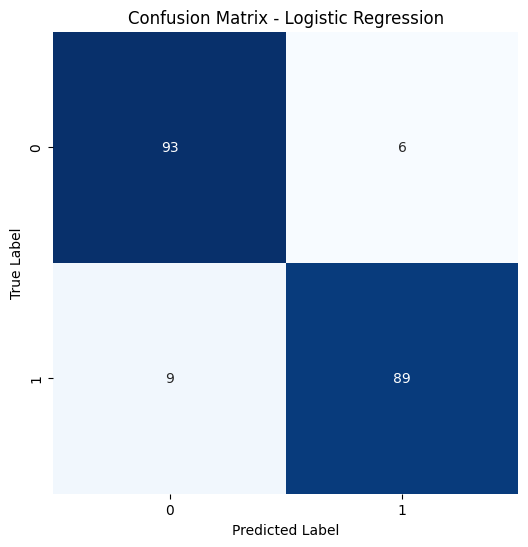

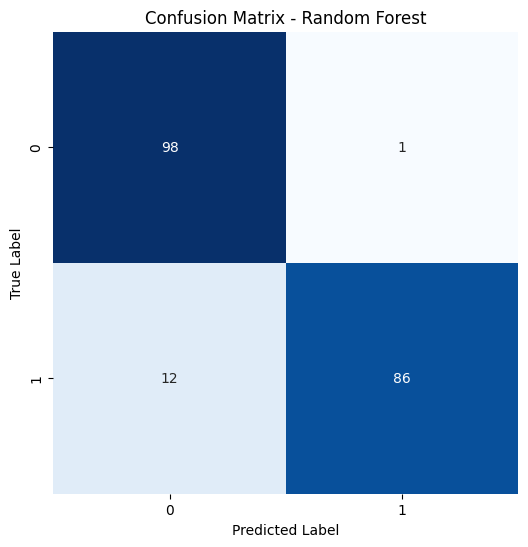

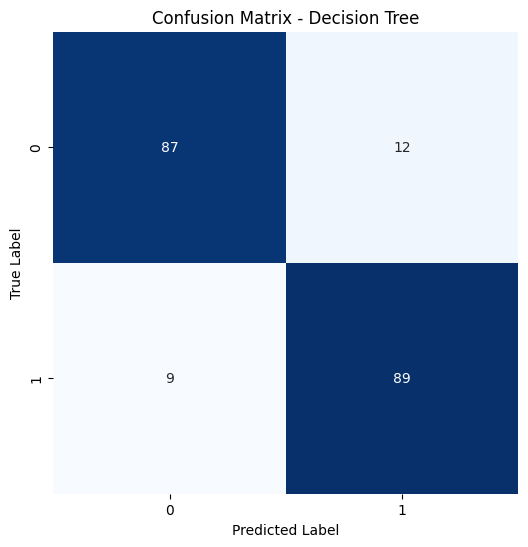

In [ ]:


cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_dt = confusion_matrix(y_test, y_pred_dt)

def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_confusion_matrix(cm_lr, "Logistic Regression")
plot_confusion_matrix(cm_rf, "Random Forest")
plot_confusion_matrix(cm_dt, "Decision Tree")

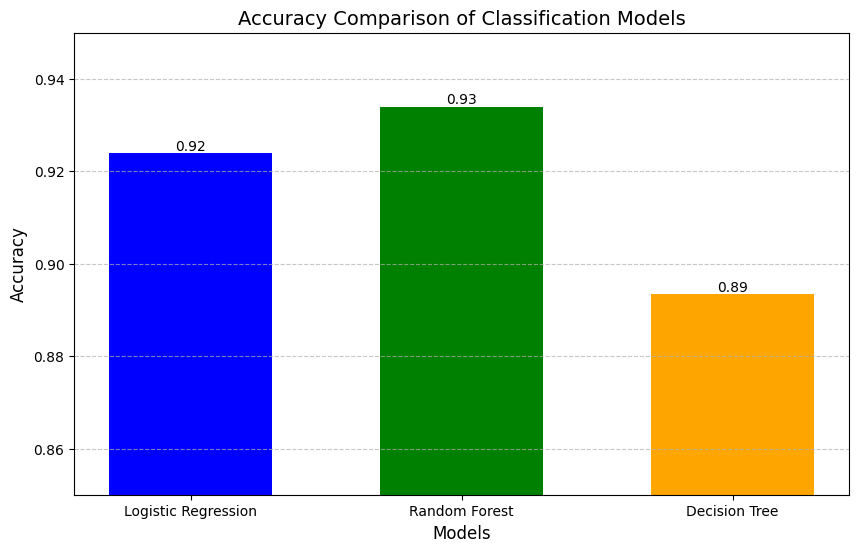

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and accuracy scores
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracy = [0.9239, 0.9340, 0.8934]  # Replace with your actual accuracy scores

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
bars = plt.bar(models, accuracy, color=['blue', 'green', 'orange'], width=0.6)  # Adjust bar width

# Add accuracy values on top of the bars for clarity
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}',
             ha='center', va='bottom', fontsize=10)

# Add chart details
plt.title('Accuracy Comparison of Classification Models', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.85, 0.95)  # Adjust the y-axis limits for better focus on the values
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for easier comparison

# Display the chart
plt.show()


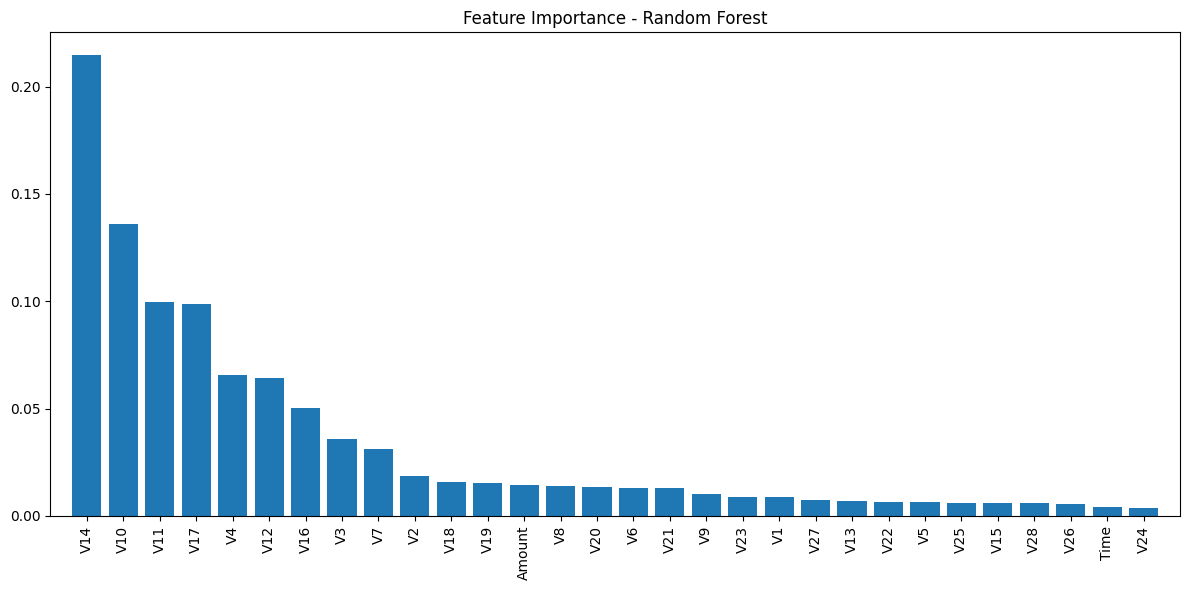

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'rf_classifier' is your trained Random Forest model
rf_classifier = classifiers["RandomForestClassifier"]

# Get feature importances
importances = rf_classifier.feature_importances_

# Get feature names (assuming X has column names)
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

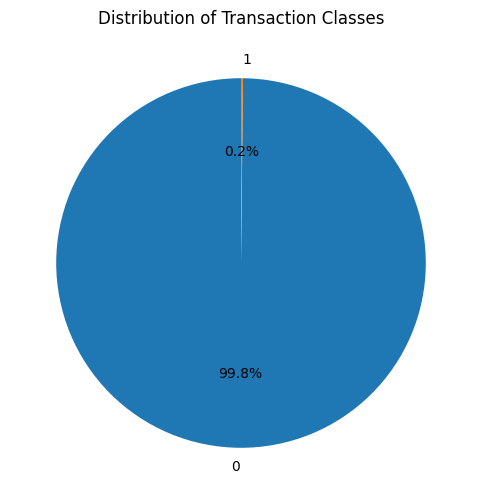

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'credit_card_data' is your DataFrame
class_counts = credit_card_data['Class'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Transaction Classes')
plt.show()

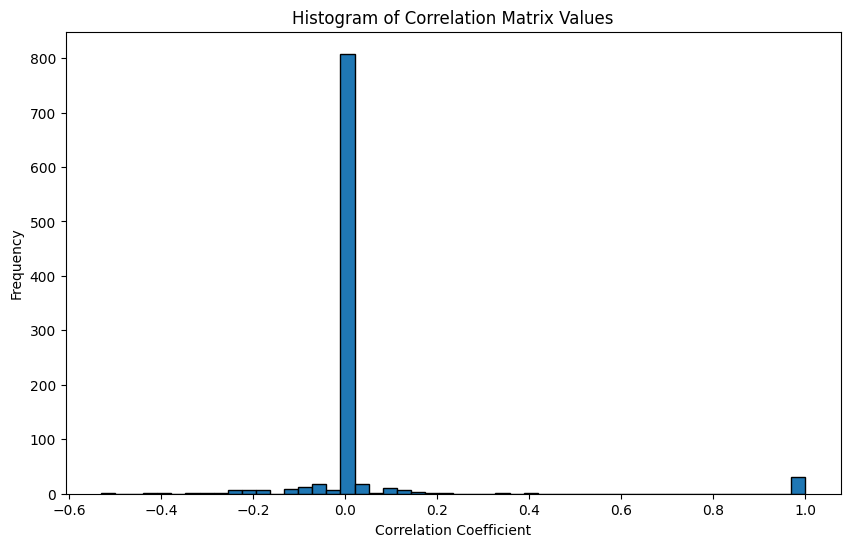

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'credit_card_data' is your DataFrame
correlation_matrix = credit_card_data.corr()

correlation_values = correlation_matrix.values.flatten()

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(correlation_values, bins=50, edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of Correlation Matrix Values')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.show()

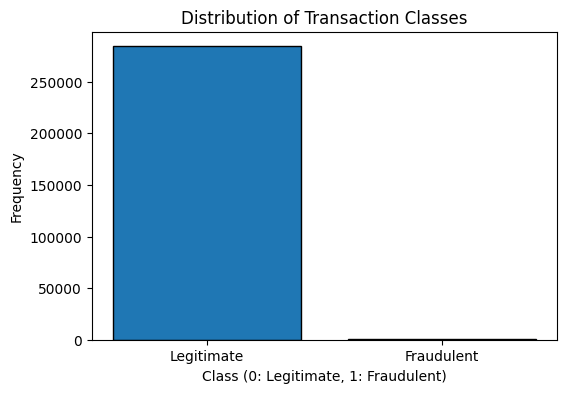

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'credit_card_data' is your DataFrame
class_distribution = credit_card_data['Class'].value_counts()

plt.figure(figsize=(6, 4))  # Adjust figure size as needed
plt.bar(class_distribution.index, class_distribution.values, edgecolor='black')
plt.title('Distribution of Transaction Classes')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])  # Set x-axis labels
plt.show()

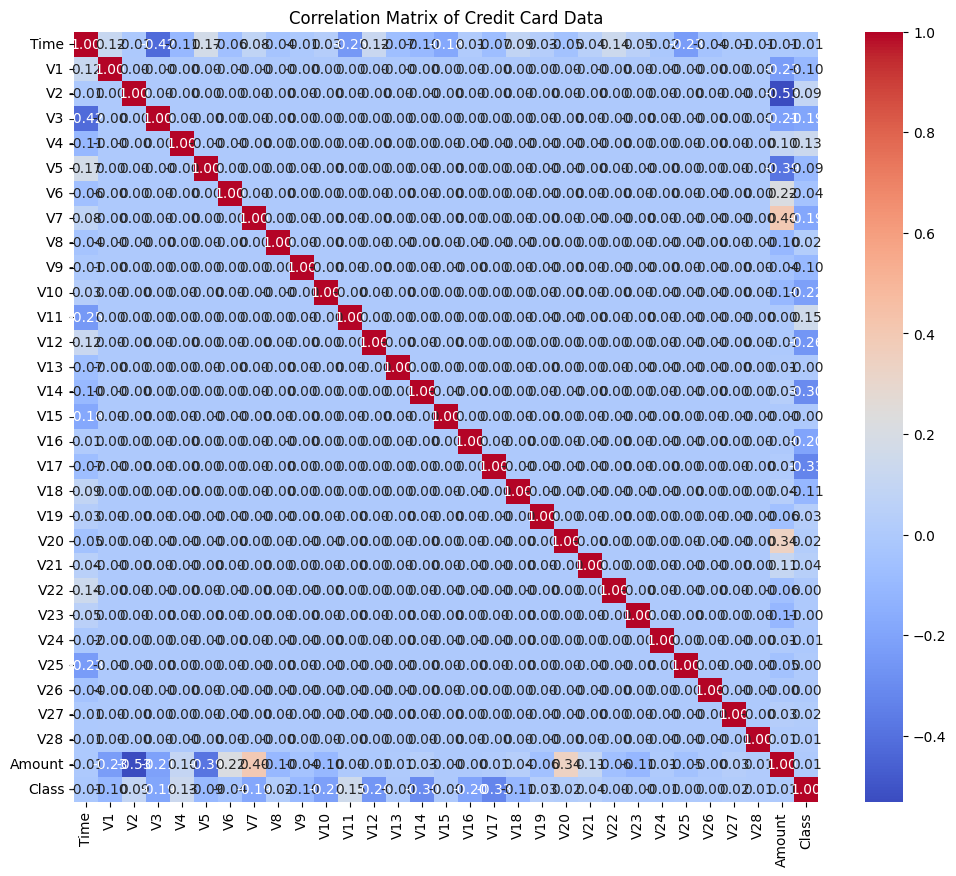

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'credit_card_data' is your DataFrame
correlation_matrix = credit_card_data.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Credit Card Data')
plt.show()